In [1]:
#prep environment 
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.compose import make_column_transformer 
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder 
from sklearn.model_selection import train_test_split

Data load and check it out

In [2]:
#load data and check out
insurance =pd.read_csv("/kaggle/input/sample-insurance-claim-prediction-dataset/insurance2.csv")
insurance.head()



,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


Data preparation to fed into the model_1 and model_2 to compare models

In [3]:
#Create column transformer
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]),
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"])
)

In [4]:
#Create X and y
X = insurance.drop("charges", axis=1)
y = insurance["charges"]

In [5]:
#Build our train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
#Fit the column transofmer to our training data
ct.fit(X_train)

ColumnTransformer(transformers=[('minmaxscaler', MinMaxScaler(),
                                 ['age', 'bmi', 'children']),
                                ('onehotencoder',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 ['sex', 'smoker', 'region'])])

In [7]:
#Transform training and test data with normalization (MinMAxScaler) and OneHotEncoder
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [8]:
#How does it look like ORIGINAL
X_train.loc[0]

age               19.0
sex                0.0
bmi               27.9
children           0.0
smoker             1.0
region             3.0
insuranceclaim     1.0
Name: 0, dtype: float64

In [9]:
#How does it look like CT´ed
X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [10]:
#Shape check
X_train.shape, X_train_normal.shape

((1070, 7), (1070, 11))

Model_1 - no assigned activators

In [11]:
#Set random
tf.random.set_seed(42)
#callback to stop learning
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=25)

#Create a model
insurance_norm_model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

#Compile the model
insurance_norm_model_1.compile(loss=tf.keras.losses.mae,
                             optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
                             metrics=["mae"])

#Fit the model
insurance_norm_model_1.fit(X_train_normal, y_train, epochs=100, verbose = 0)

In [12]:
#Evaluate our insurance model tried on normalized data
insurance_norm_model_1.evaluate(X_test_normal, y_test)

#mae is ~3200!!!!

9/9 [==============================] - 0s 2ms/step - loss: 3276.2678 - mae: 3276.2678


[3276.267822265625, 3276.267822265625]

In [13]:
#predict with model_1
pred_norm_model_1 = insurance_norm_model_1.predict(X_test_normal)

9/9 [==============================] - 0s 2ms/step


Correlation coefficient:  0.7263076608246916
Mean Absolute Error:  3276.2680238042158
R2 score:  0.7263076608246916


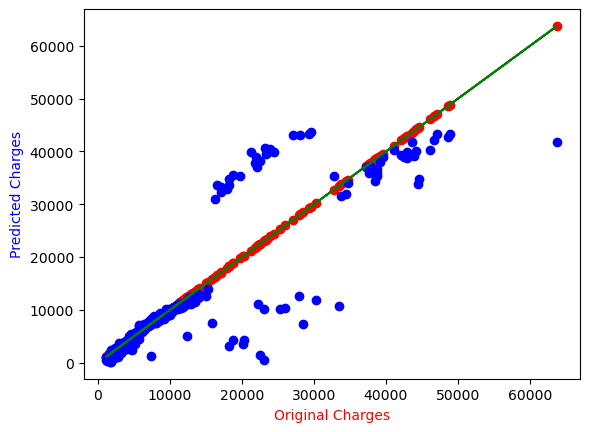

In [14]:
#Visual of prediction vs original data set
plt.scatter(y_test, y_test, color='red', label='Original Charges')
plt.scatter(y_test, pred_norm_model_1, color='blue', label='Predicted Charges')
plt.xlabel("Original Charges", c="r")
plt.ylabel("Predicted Charges", c="b")
plt.plot(y_test, y_test, color='green')
r = r2_score(y_test, pred_norm_model_1)
print("Correlation coefficient: ", r)
mae = mean_absolute_error(y_test, pred_norm_model_1)
print("Mean Absolute Error: ", mae)
r2 = r2_score(y_test, pred_norm_model_1)
print("R2 score: ", r2)

Model_2 - with assigned activators

In [15]:
#Prep
tf.random.set_seed(42)
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=10)

#Create mode based on model_3
insurance_model_3_norm = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(10, activation = 'relu'),
    tf.keras.layers.Dense(1)
])

#Compile the model
insurance_model_3_norm.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
                          metrics =["mae"])

#Fit the model
history_3_norm = insurance_model_3_norm.fit(X_train_normal, y_train, epochs=500, verbose=0, callbacks=[callback])

In [16]:
#Evaluate model_3_norm
insurance_model_3_norm.evaluate(X_test_normal, y_test)

#mae: ~1800!!!

9/9 [==============================] - 0s 2ms/step - loss: 1866.7959 - mae: 1866.7959


[1866.7958984375, 1866.7958984375]

In [17]:
#predict with the model with activation
pred = insurance_model_3_norm.predict(X_test_normal)

9/9 [==============================] - 0s 2ms/step


Correlation coefficient:  0.8610621356022087
Mean Absolute Error:  1866.796079351154
R2 score:  0.8610621356022087


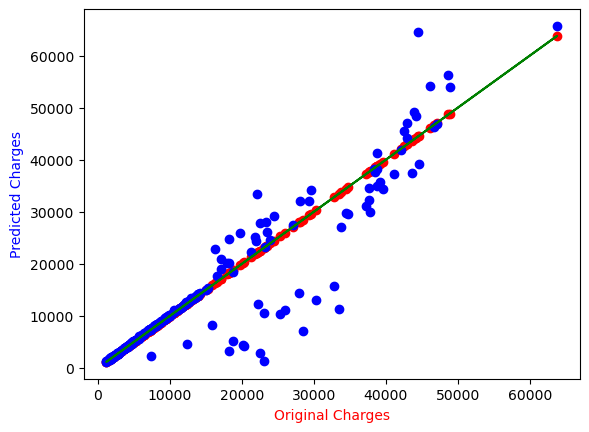

In [18]:

#Visual of prediction vs original data set
plt.scatter(y_test, y_test, color='red', label='Original Charges')
plt.scatter(y_test, pred, color='blue', label='Predicted Charges')
plt.xlabel("Original Charges", c="r")
plt.ylabel("Predicted Charges", c="b")
plt.plot(y_test, y_test, color='green')
r = r2_score(y_test, pred)
print("Correlation coefficient: ", r)
mae = mean_absolute_error(y_test, pred)
print("Mean Absolute Error: ", mae)
r2 = r2_score(y_test, pred)
print("R2 score: ", r2)